# Monetary Economics: Chapter 6

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt

### Model REG

In [2]:
def create_reg_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Bills held by the Central Bank')
    model.var('Bh', desc='Overall bils outstanding')
    model.var('BhN', desc='Bills held by households, Region N')
    model.var('BhS', desc='Bills held by households, Region S')
    model.var('Bs', desc='Bills supplied by government')
    model.var('CN', desc='Consumption, Region N')
    model.var('CS', desc='Consumption, Region S')
    model.var('G', desc='Overall government expenditure')
    model.var('Hh', desc='Overall cash outstanding')
    model.var('HhN', desc='Cash held by households, Region N')
    model.var('HhS', desc='Cash held by households, Region S')
    model.var('Hs', desc='Supply of cash')
    model.var('IMN', desc='Imports, Region N')
    model.var('IMS', desc='Imports, Region S')
    model.var('R', desc='Interest rate on bills')
    model.var('T', desc='Overall tax payments')
    model.var('TN', desc='Tax payments Region N')
    model.var('TS', desc='Tax payments Region S')
    model.var('VN', desc='Household wealth, Region N')
    model.var('VS', desc='Household wealth, Region S')
    model.var('XN', desc='Exports, Region N')
    model.var('XS', desc='Exports, Region S')
    model.var('YN', desc='National income, Region N')
    model.var('YS', desc='National income, Region S')
    model.var('YDN', desc='National disposable income, Region N')
    model.var('YDS', desc='National disposable income, Region S')

    model.set_param_default(0)
    model.param('alpha1N', desc='Propensity to consume out of income, Region N')
    model.param('alpha1S', desc='Propensity to consume out of income, Region S')
    model.param('alpha2N', desc='Propensity to consume out of wealth, Region N')
    model.param('alpha2S', desc='Propensity to consume out of wealth, Region S')
    model.param('lambda0N', desc='Parameter in asset demand function, Region N')
    model.param('lambda0S', desc='Parameter in asset demand function, Region S')
    model.param('lambda1N', desc='Parameter in asset demand function, Region N')
    model.param('lambda1S', desc='Parameter in asset demand function, Region S')
    model.param('lambda2N', desc='Parameter in asset demand function, Region N')
    model.param('lambda2S', desc='Parameter in asset demand function, Region S')
    model.param('muN', desc='Import propensity, Region N')
    model.param('muS', desc='Import propensity, Region S')
    model.param('theta', desc='Tax rate')

    model.param('Rbar', desc='Exogenously set interest rate on govt bills')
    model.param('GN', desc='Government expenditure, Region N')
    model.param('GS', desc='Government expenditure, Region S')

    model.add('YN = CN + GN + XN - IMN')
    model.add('YS = CS + GS + XS - IMS')
    model.add('IMN = muN * YN')
    model.add('IMS = muS * YS')
    model.add('XN = IMS')
    model.add('XS = IMN')
    model.add('YDN = YN - TN + R(-1)*BhN(-1)')
    model.add('YDS = YS - TS + R(-1)*BhS(-1)')
    model.add('TN = theta * (YN + R(-1)*BhN(-1))')
    model.add('TS = theta * (YS + R(-1)*BhS(-1))')
    model.add('VN - VN(-1) = YDN - CN')
    model.add('VS - VS(-1) = YDS - CS')
    model.add('CN = alpha1N*YDN + alpha2N*VN(-1)')
    model.add('CS = alpha1S*YDS + alpha2S*VS(-1)')
    model.add('HhN = VN - BhN')
    model.add('HhS = VS - BhS')
    model.add('BhN = VN*(lambda0N + lambda1N*R - lambda2N*(YDN/VN))')
    model.add('BhS = VS*(lambda0S + lambda1S*R - lambda2S*(YDS/VS))')
    model.add('T = TN + TS')
    model.add('G = GN + GS')
    model.add('Bh = BhN + BhS')
    model.add('Hh = HhN + HhS')
    model.add('Bs = Bs(-1) + (G + R(-1)*Bs(-1)) - (T + R(-1)*Bcb(-1))')
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')
    model.add('Bcb = Bs - Bh')
    model.add('R = Rbar')
    
    return model

reg_parameters = {'alpha1N': 0.6,
                  'alpha1S': 0.7,
                  'alpha2N': 0.4,
                  'alpha2S': 0.3,
                  'lambda0N': 0.635,
                  'lambda0S': 0.67,
                  'lambda1N': 5,
                  'lambda1S': 6,
                  'lambda2N': 0.01,
                  'lambda2S': 0.07,
                  'muN': 0.18781,
                  'muS': 0.18781,                  
                  'theta': 0.2}
reg_exogenous = {'GN': 20,
                 'GS': 20,
                 'Rbar': 0.025}
reg_variables = [('Bcb', 43.244),
                 ('BhN', 64.865),
                 ('BhS', 64.865),
                 ('Bh', 'BhN + BhS'),
                 ('Bs', 'Bh + Bcb'),
                 ('R', 0.025),
                 ('VN', 86.487),
                 ('VS', 86.487),
                 ('HhN', 'VN - BhN'),
                 ('HhS', 'VS - BhS'),
                 ('Hh', 'HhN + HhS'),
                 ('Hs', 'Hh')]

### Scenario: Model REG, increase propensity to import for Region S

In [3]:
muS = create_reg_model()
muS.set_values(reg_parameters)
muS.set_values(reg_exogenous)
muS.set_values(reg_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(40):
    muS.solve(iterations=100, threshold=1e-6)

muS.solutions = muS.solutions[25:]

# shock the system
muS.set_values({'muS': 0.20781})

for _ in range(40):
    muS.solve(iterations=100, threshold=1e-6)

###### Figure 6.1

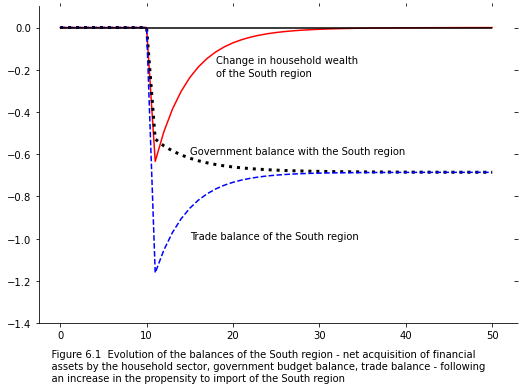

In [4]:
caption = '''
    Figure 6.1  Evolution of the balances of the South region - net acquisition of financial
    assets by the household sector, government budget balance, trade balance - following 
    an increase in the propensity to import of the South region'''

vsdata = list()
govdata = list()
tradedata = list()
for i in range(5, len(muS.solutions)):
    s = muS.solutions[i]
    s_1 = muS.solutions[i-1]
    vsdata.append(s['VS'] - s_1['VS'])
    govdata.append(s['TS'] -(s['GS'] + s['R']*s_1['BhS']))
    tradedata.append(s['XS'] - s['IMS'])


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-1.4, 0.1)

axes.plot(vsdata, linestyle='-', color='r')
axes.plot(govdata, linestyle=':', color='k', linewidth=3)
axes.plot(tradedata, linestyle='--', color='b')

plt.hlines(0, 0, 50, color='k')

# add labels
plt.text(18, -.17, 'Change in household wealth')
plt.text(18, -.23, 'of the South region')
plt.text(15, -0.6, 'Government balance with the South region')
plt.text(15, -1.0, 'Trade balance of the South region')
fig.text(0.1, -.1, caption);

###### Figure 6.2

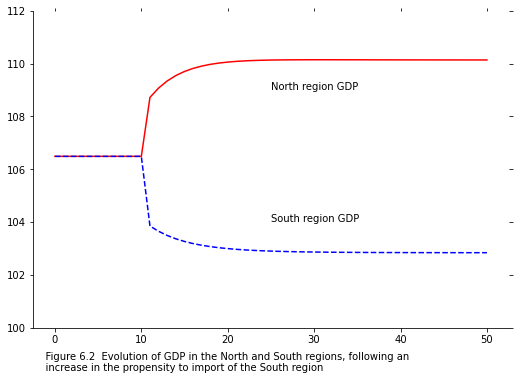

In [5]:
caption = '''
    Figure 6.2  Evolution of GDP in the North and South regions, following an
    increase in the propensity to import of the South region'''
yndata = [s['YN'] for s in muS.solutions[5:]]
ysdata = [s['YS'] for s in muS.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(100, 112)

axes.plot(yndata, linestyle='-', color='r')
axes.plot(ysdata, linestyle='--', color='b')

# add labels
plt.text(25, 109, 'North region GDP')
plt.text(25, 104, 'South region GDP')
fig.text(0.1, -.05, caption);

### Scenario: Model REG, increase in govt expenditures in Region S

In [6]:
GS = create_reg_model()
GS.set_values(reg_parameters)
GS.set_values(reg_exogenous)
GS.set_values(reg_variables)

# run to convergence
for _ in range(40):
    GS.solve(iterations=100, threshold=1e-6)
    
GS.solutions = GS.solutions[25:]

# shock the system
GS.set_values({'GS': 25})

for _ in range(40):
    GS.solve(iterations=100, threshold=1e-6)

###### Figure 6.3

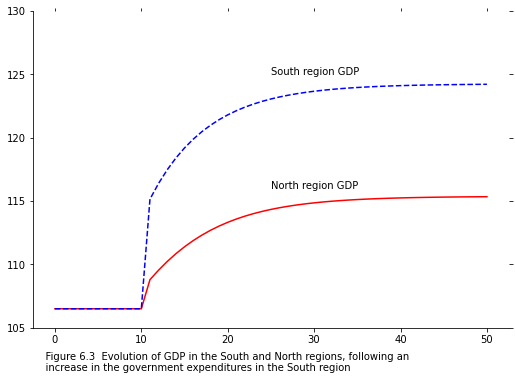

In [7]:
caption = '''
    Figure 6.3  Evolution of GDP in the South and North regions, following an
    increase in the government expenditures in the South region'''
yndata = [s['YN'] for s in GS.solutions[5:]]
ysdata = [s['YS'] for s in GS.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(105, 130)

axes.plot(yndata, linestyle='-', color='r')
axes.plot(ysdata, linestyle='--', color='b')

# add labels
plt.text(25, 116, 'North region GDP')
plt.text(25, 125, 'South region GDP')
fig.text(0.1, -.05, caption);

###### Figure 6.4

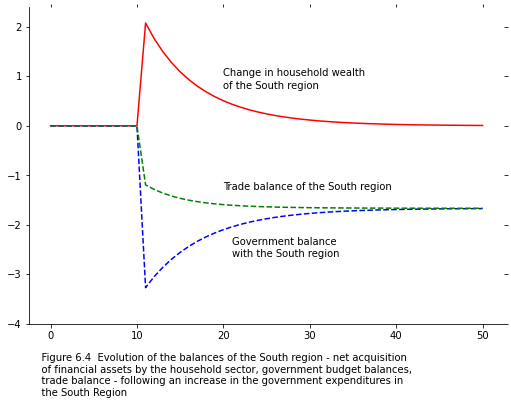

In [8]:
caption = '''
    Figure 6.4  Evolution of the balances of the South region - net acquisition
    of financial assets by the household sector, government budget balances,
    trade balance - following an increase in the government expenditures in
    the South Region'''
vsdata = list()
govdata = list()
tradedata = list()

for i in range(5, len(GS.solutions)):
    s = GS.solutions[i]
    s_1 = GS.solutions[i-1]
    vsdata.append(s['VS'] - s_1['VS'])
    govdata.append(s['TS'] -(s['GS'] + s['R']*s_1['BhS']))
    tradedata.append(s['XS'] - s['IMS'])


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-4, 2.4)

axes.plot(vsdata, linestyle='-', color='r')
axes.plot(govdata, linestyle='--', color='b')
axes.plot(tradedata, linestyle='--', color='g')

# add labels
plt.text(20, 1, 'Change in household wealth')
plt.text(20, 0.75, 'of the South region')
plt.text(20, -1.3, 'Trade balance of the South region')
plt.text(21, -2.4, 'Government balance')
plt.text(21, -2.65, 'with the South region')
fig.text(0.1, -.15, caption);

### Scenario: Model REG, increase the propensity to save in the South region

In [9]:
alpha1S = create_reg_model()
alpha1S.set_values(reg_parameters)
alpha1S.set_values(reg_exogenous)
alpha1S.set_values(reg_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(40):
    alpha1S.solve(iterations=100, threshold=1e-6)

alpha1S.solutions = alpha1S.solutions[25:]
# shock the system
alpha1S.set_values({'alpha1S': 0.6})

for _ in range(40):
    alpha1S.solve(iterations=100, threshold=1e-6)

###### Figure 6.5

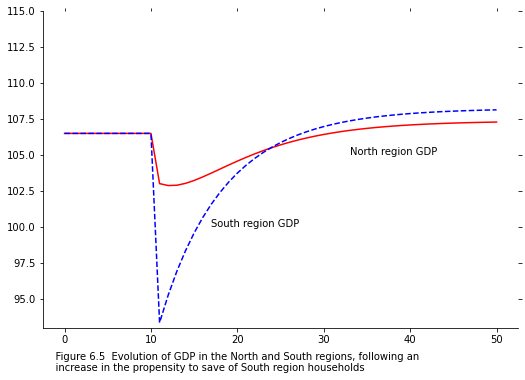

In [10]:
caption = '''
    Figure 6.5  Evolution of GDP in the North and South regions, following an
    increase in the propensity to save of South region households'''
yndata = [s['YN'] for s in alpha1S.solutions[5:]]
ysdata = [s['YS'] for s in alpha1S.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(93, 115)

axes.plot(yndata, linestyle='-', color='r')
axes.plot(ysdata, linestyle='--', color='b')

# add labels
plt.text(33, 105, 'North region GDP')
plt.text(17, 100, 'South region GDP')
fig.text(0.1, -.05, caption);

###### Figure 6.6

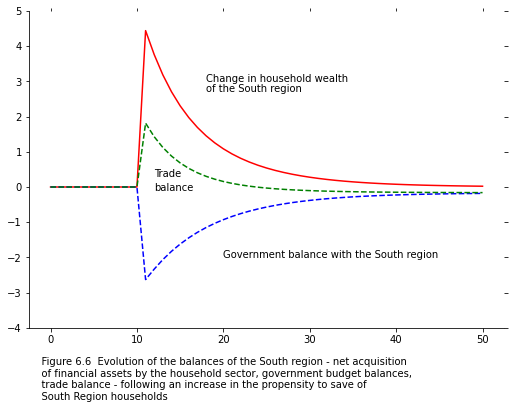

In [11]:
caption = '''
    Figure 6.6  Evolution of the balances of the South region - net acquisition
    of financial assets by the household sector, government budget balances,
    trade balance - following an increase in the propensity to save of
    South Region households'''

vsdata = list()
govdata = list()
tradedata = list()

for i in range(5, len(alpha1S.solutions)):
    s = alpha1S.solutions[i]
    s_1 = alpha1S.solutions[i-1]
    vsdata.append(s['VS'] - s_1['VS'])
    govdata.append(s['TS'] -(s['GS'] + s['R']*s_1['BhS']))
    tradedata.append(s['XS'] - s['IMS'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-4, 5)

axes.plot(vsdata, linestyle='-', color='r')
axes.plot(govdata, linestyle='--', color='b')
axes.plot(tradedata, linestyle='--', color='g')

# add labels
plt.text(18, 3, 'Change in household wealth')
plt.text(18, 2.7, 'of the South region')
plt.text(12, 0.3, 'Trade')
plt.text(12, -.1, 'balance')
plt.text(20, -2, 'Government balance with the South region')
fig.text(0.1, -.15, caption);

### Scenario: Model REG, increase in the liquidity preference in Region S

In [12]:
lambda0S = create_reg_model()
lambda0S.set_values(reg_parameters)
lambda0S.set_values(reg_exogenous)
lambda0S.set_values(reg_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(40):
    lambda0S.solve(iterations=100, threshold=1e-6)

lambda0S.solutions = lambda0S.solutions[25:]
# shock the system
lambda0S.set_values({'lambda0S': 0.75})

for _ in range(40):
    lambda0S.solve(iterations=100, threshold=1e-6)

###### Figure 6.7

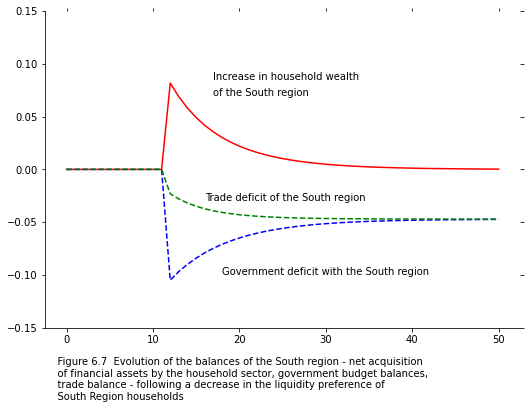

In [13]:
caption = '''
    Figure 6.7  Evolution of the balances of the South region - net acquisition
    of financial assets by the household sector, government budget balances,
    trade balance - following a decrease in the liquidity preference of
    South Region households'''
vsdata = list()
govdata = list()
tradedata = list()

for i in range(5, len(lambda0S.solutions)):
    s = lambda0S.solutions[i]
    s_1 = lambda0S.solutions[i-1]
    vsdata.append(s['VS'] - s_1['VS'])
    govdata.append(s['TS'] -(s['GS'] + s['R']*s_1['BhS']))
    tradedata.append(s['XS'] - s['IMS'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.15, 0.15)

axes.plot(vsdata, linestyle='-', color='r')
axes.plot(govdata, linestyle='--', color='b')
axes.plot(tradedata, linestyle='--', color='g')

# add labels
plt.text(17, 0.085, 'Increase in household wealth')
plt.text(17, 0.07, 'of the South region')
plt.text(16, -.03, 'Trade deficit of the South region')
plt.text(18, -.1, 'Government deficit with the South region')
fig.text(0.1, -.15, caption);